# Vornamen in der Schweiz

In [1]:
import pandas as pd

In [2]:
df_namen = pd.read_csv("vornamen_proplz.csv", sep=";")

In [3]:
len(df_namen)

31491

Zeige alle Nr. 1 Namen von Frauen und Männern

In [4]:
df_namen[(df_namen['geschlecht']=="w") & (df_namen['rang']==1)]['vorname'].value_counts().head(5)

Maria     939
Ursula    194
Sandra    169
Ruth      167
Monika    166
Name: vorname, dtype: int64

In [5]:
df_namen[(df_namen['geschlecht']=="m") & (df_namen['rang']==1)]['vorname'].value_counts().head(5)

Peter     762
Daniel    458
Thomas    233
Hans      214
Michel    157
Name: vorname, dtype: int64

## Plotten mit GeoPandas

In [25]:
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline

In [26]:
gdf = gpd.read_file("plz_verzeichnis_v2.shp")

In [27]:
gdf.head(3)

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
0,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,2.0,None,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382..."
1,01,1522.0,6757.0,20.0,2354.0,00,2354.0,Goumois,Goumois,JU,2.0,None,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9459473802 47.2805882184, 6.945951..."
2,01,1525.0,707.0,20.0,2732.0,03,2732.0,Saules BE,Saules BE,BE,2.0,None,1523.0,19990928.0,273200.0,J,"POLYGON ((7.2285642031 47.2401886474, 7.228489..."


In [38]:
gdf_merged = pd.merge(gdf, df_namen, how='left', left_on='gplz', right_on="plz")

In [39]:
gdf_merged.head(4)

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18_x,ortbez27,kanton,...,plz_briefzu,plz_coff,geometry,stichdatum,plz,geschlecht,vorname,anzahl,rang,ortbez18_y
0,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,...,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382...",2018-11-01,2340.0,w,Maria,19.0,1.0,Le Noirmont
1,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,...,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382...",2018-11-01,2340.0,w,Isabelle,10.0,5.0,Le Noirmont
2,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,...,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382...",2018-11-01,2340.0,w,Sophie,10.0,5.0,Le Noirmont
3,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,...,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382...",2018-11-01,2340.0,w,Sandra,10.0,5.0,Le Noirmont


In [30]:
gdf_merged.crs

{'init': 'epsg:4326'}

In [31]:
gdf_merged.crs = {'init': 'epsg:4326'}

In [41]:
gdf_merged = gdf_merged.to_crs(epsg=21781)

AttributeError: 'NoneType' object has no attribute 'is_empty'

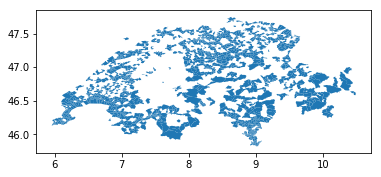

In [33]:
gdf_merged[(gdf_merged['vorname']=="Maria")&(gdf_merged['geschlecht']=="w")].plot()

Mit GeoPandas plotten

In [34]:
gdf

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
0,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,2.0,None,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382..."
1,01,1522.0,6757.0,20.0,2354.0,00,2354.0,Goumois,Goumois,JU,2.0,None,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9459473802 47.2805882184, 6.945951..."
2,01,1525.0,707.0,20.0,2732.0,03,2732.0,Saules BE,Saules BE,BE,2.0,None,1523.0,19990928.0,273200.0,J,"POLYGON ((7.2285642031 47.2401886474, 7.228489..."
3,01,1530.0,717.0,20.0,2735.0,02,2735.0,BÃ©vilard,BÃ©vilard,BE,2.0,None,1523.0,19990507.0,273200.0,J,"POLYGON ((7.297006503 47.2187735659, 7.2964050..."
4,01,1538.0,716.0,20.0,2748.0,00,2748.0,Souboz,Souboz,BE,2.0,None,7347.0,19881222.0,274060.0,J,"POLYGON ((7.2955158802 47.2698711862, 7.294448..."
5,01,1540.0,681.0,20.0,2744.0,00,2744.0,Belprahon,Belprahon,BE,2.0,None,7347.0,20001030.0,274060.0,J,"POLYGON ((7.3934294594 47.2838428636, 7.393433..."
6,01,1542.0,694.0,20.0,2745.0,00,2745.0,Grandval,Grandval,BE,2.0,None,7347.0,19860521.0,274060.0,J,"POLYGON ((7.4358377064 47.261101554, 7.4355641..."
7,01,1543.0,691.0,10.0,2746.0,00,2746.0,CrÃ©mines,CrÃ©mines,BE,2.0,None,7347.0,19860521.0,274060.0,J,"POLYGON ((7.4466748361 47.2644397112, 7.446585..."
8,01,1547.0,6720.0,20.0,2832.0,00,2832.0,Rebeuvelier,Rebeuvelier,JU,2.0,None,1554.0,19960919.0,280060.0,J,"POLYGON ((7.4415055707 47.3099061007, 7.440538..."
9,01,1551.0,6711.0,20.0,2800.0,00,2800.0,DelÃ©mont,DelÃ©mont,JU,2.0,None,1554.0,19960913.0,280060.0,J,"POLYGON ((7.3343515341 47.3491878397, 7.334018..."


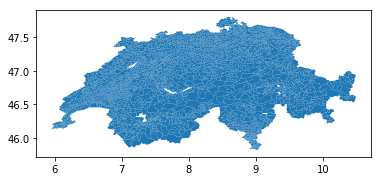

In [35]:
gdf.plot()

In [36]:
gdf.crs

{'init': 'epsg:4326'}

In [37]:
gdf = gdf.to_crs(epsg=21781)

AttributeError: 'NoneType' object has no attribute 'is_empty'